In [1]:
# This jupyter notebook was prepared by Jason Saini

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1. Load and Perform Basic EDA

In [3]:
##### import libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as msno
from scipy import stats

import sklearn

In [4]:
# II. import the data to a dataframe and show number of rows & cols
df = pd.read_csv("hrdata2.csv")
print("Number of rows: " + str(df.shape[0]))
print("Number of cols: " + str(df.shape[1]))

Number of rows: 8955
Number of cols: 15


In [5]:
# Show top 5 and last 5 rows
df.head()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
1,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0
2,7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0


In [6]:
df.tail()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
8950,19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1
8951,19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1
8952,19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0
8953,19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,Oct-49,Funded Startup,1,25,0
8954,19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,4,44,0


In [7]:
#Show how many columns have null values
df.isnull().any()

Unnamed: 0                False
enrollee_id               False
city                      False
city_development_index    False
gender                    False
relevent_experience       False
enrolled_university       False
education_level           False
major_discipline          False
experience                False
company_size              False
company_type              False
last_new_job              False
training_hours            False
target                    False
dtype: bool

### dataset has no missing values.

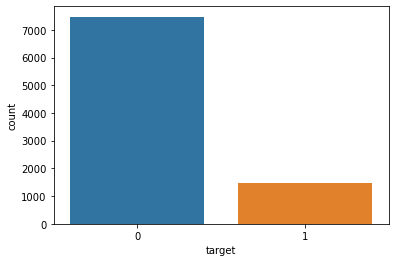

In [8]:
# Plot the count of target
ax = sns.countplot(x = "target", data = df)

## discuss its imbalances and probably issues and solutions:
### Clearly the data has a lot more 0 values for target, which will definitely cause a bias in our classification models. Our classifier will not be able to properly identify each class, and will most likely overfit to the 0.0 labels. We could solve this by oversampling targets with value 1.0 or undersampling targets with 0.0. After researching from the assignment specs, I see that we can use SMOTE (Synthetic Minority Oversampling Technique) to oversample (in this case 1.0) to generate new instances of minority cases to help balance the data.

In [9]:
df = df.drop("Unnamed: 0",axis = 1)
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1
8951,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1
8952,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0
8953,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,Oct-49,Funded Startup,1,25,0


## 2. Feature Selection and Pre-processing

### 2.1. Preprocessing City

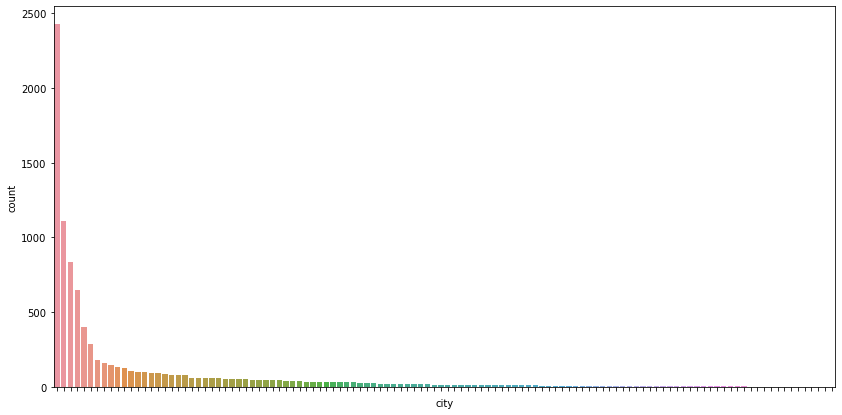

In [10]:
# Plot #of records per city so that the highest city counts are shown in descending order
plt.figure(figsize=(14,7))
ax = sns.countplot(x = "city", data = df, order = df["city"].value_counts().index)
ax.set(xticklabels=[])
plt.show()

##### How many rows belong to the top 5 cities in total and how many for the remaining?

In [11]:
df["city"].value_counts()

city_103    2426
city_21     1111
city_16      836
city_114     648
city_160     401
            ... 
city_127       1
city_107       1
city_62        1
city_109       1
city_25        1
Name: city, Length: 116, dtype: int64

### The top 5 cities:

In [12]:
top_cities = df["city"].value_counts().head(5)
top_cities

city_103    2426
city_21     1111
city_16      836
city_114     648
city_160     401
Name: city, dtype: int64

## And the rest have 1 row per city

In [13]:
# Replace the city name with city_others if the city name is not within the top 4 city names
df = df.loc[~df["city"].isin(top_cities)].rename(columns={'city' : 'city_others'})

In [14]:
#records have changed accordingly
df

,enrollee_id,city_others,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1
8951,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1
8952,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0
8953,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,Oct-49,Funded Startup,1,25,0


### 2.2. Preprocessing Education Level

In [15]:
# unique values of education level
df["education_level"].unique()

array(['Graduate', 'Masters', 'Phd'], dtype=object)

In [16]:
# Replace the value of Education level column like ordinal values
# "Graduate" -> 0, Masters->1, and Phd -> 2 
education_mapper = {"Graduate": 0, "Masters": 1, "Phd": 2}
df["education_level"] = df["education_level"].replace(education_mapper)
df["education_level"]

0       0
1       1
2       0
3       0
4       0
       ..
8950    0
8951    1
8952    0
8953    0
8954    0
Name: education_level, Length: 8955, dtype: int64

In [17]:
# updated values of education level
df["education_level"].unique()

array([0, 1, 2], dtype=int64)

### 2.3. Preprocessing Company size

In [18]:
# unique values of the company_size column
df["company_size"].unique()

array(['50-99', '<10', '5000-9999', '1000-4999', 'Oct-49', '100-500',
       '10000+', '500-999'], dtype=object)

In [19]:
# Change the values of the company_size column from
# 0 to 7 where 0 is <10 and 7 is 10000+

In [20]:
df.loc[df.company_size == '<10', 'company_size'] = 0
df.loc[np.logical_or(df.company_size == 'Oct-49', df.company_size == '10-49'), "company_size"] = 1
df.loc[df.company_size == '50-99', 'company_size'] = 2
df.loc[df.company_size == '100-500', 'company_size'] = 3
df.loc[df.company_size == '500-999', 'company_size'] = 4
df.loc[df.company_size == '1000-4999', 'company_size'] = 5
df.loc[df.company_size == '5000-9999', 'company_size'] = 6
df.loc[df.company_size == '10000+', 'company_size'] = 7

df["company_size"].unique()

array([2, 0, 6, 5, 1, 3, 7, 4], dtype=object)

### 2.4 Preprocessing last new job

In [21]:
# unique values of the company_size column
df["last_new_job"].unique()

array(['>4', '4', '1', '3', '2', 'never'], dtype=object)

In [22]:
# Convert the values of this column
LNJ_mapper = {"never": 0, "1": 1, "2": 2, "3":3, "4":4, ">4":5}
df["last_new_job"] = df["last_new_job"].replace(LNJ_mapper)

In [23]:
# updated values of last_new_job
df["last_new_job"].unique()

array([5, 4, 1, 3, 2, 0], dtype=int64)

### 2.5 Remaining columns

In [24]:
# Show the unique values of 
# company_type, major_descipline, enrolled_university, 
# relevant_experience, gender, and updated city column
df["company_type"].unique()

array(['Pvt Ltd', 'Funded Startup', 'Early Stage Startup',
       'Public Sector', 'NGO', 'Other'], dtype=object)

In [25]:
df["major_discipline"].unique()

array(['STEM', 'Humanities', 'Business Degree', 'Other', 'No Major',
       'Arts'], dtype=object)

In [26]:
df["enrolled_university"].unique()

array(['no_enrollment', 'Part time course', 'Full time course'],
      dtype=object)

In [27]:
df["relevent_experience"].unique()

array(['No relevent experience', 'Has relevent experience'], dtype=object)

In [28]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [29]:
df["city_others"].unique()

array(['city_40', 'city_162', 'city_46', 'city_103', 'city_61',
       'city_114', 'city_159', 'city_21', 'city_160', 'city_16',
       'city_83', 'city_64', 'city_105', 'city_104', 'city_73', 'city_75',
       'city_100', 'city_93', 'city_67', 'city_13', 'city_36', 'city_71',
       'city_57', 'city_65', 'city_11', 'city_136', 'city_97', 'city_50',
       'city_173', 'city_82', 'city_89', 'city_150', 'city_90', 'city_98',
       'city_28', 'city_115', 'city_94', 'city_165', 'city_142',
       'city_12', 'city_43', 'city_74', 'city_102', 'city_116', 'city_99',
       'city_23', 'city_138', 'city_45', 'city_41', 'city_72', 'city_19',
       'city_101', 'city_20', 'city_106', 'city_10', 'city_157',
       'city_144', 'city_91', 'city_133', 'city_145', 'city_123',
       'city_175', 'city_128', 'city_167', 'city_84', 'city_54',
       'city_126', 'city_81', 'city_176', 'city_131', 'city_149',
       'city_24', 'city_27', 'city_118', 'city_152', 'city_141',
       'city_76', 'city_70', 'ci

In [30]:
# function to one-hot-encode our categorical columns
def one_hot_encode(in_df, cat_cols):
    for col in cat_cols:
        temp_df = pd.get_dummies(in_df[col], prefix = col, drop_first = True)
        in_df = in_df.drop(columns = col)
        
        encoded_df = pd.merge(
        left = in_df,
        right = temp_df,
        left_index = True,
        right_index = True,
        )
    if(col in encoded_df.columns):
        encoded_df = encoded_df.drop(columns = col)
    print(encoded_df)
    return encoded_df

In [31]:
# show all columns for one-hot encoding
pd.set_option('display.max_columns', None)
one_hot_encoded_df = one_hot_encode(df,["company_type","major_discipline","enrolled_university","relevent_experience", "gender", "city_others"] ) #pd.get_dummies(df, columns = ["company_type","major_discipline","enrolled_university","relevent_experience", "gender", "city_others"], drop_first = True)

      enrollee_id  city_development_index  education_level  experience  \
0           29725                   0.776                0          15   
1             666                   0.767                1          21   
2             402                   0.762                0          13   
3           27107                   0.920                0           7   
4           23853                   0.920                0           5   
...           ...                     ...              ...         ...   
8950        21319                   0.624                0           1   
8951          251                   0.920                1           9   
8952        32313                   0.920                0          10   
8953        29754                   0.920                0           7   
8954        24576                   0.920                0          21   

     company_size  last_new_job  training_hours  target  city_others_city_10  \
0               2             5

In [32]:
one_hot_encoded_df.head()

,enrollee_id,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,city_others_city_10,city_others_city_100,city_others_city_101,city_others_city_102,city_others_city_103,city_others_city_104,city_others_city_105,city_others_city_106,city_others_city_107,city_others_city_109,city_others_city_11,city_others_city_114,city_others_city_115,city_others_city_116,city_others_city_117,city_others_city_118,city_others_city_12,city_others_city_120,city_others_city_121,city_others_city_123,city_others_city_126,city_others_city_127,city_others_city_128,city_others_city_129,city_others_city_13,city_others_city_131,city_others_city_133,city_others_city_134,city_others_city_136,city_others_city_138,city_others_city_139,city_others_city_14,city_others_city_141,city_others_city_142,city_others_city_143,city_others_city_144,city_others_city_145,city_others_city_146,city_others_city_149,city_others_city_150,city_others_city_152,city_others_city_155,city_others_city_157,city_others_city_158,city_others_city_159,city_others_city_16,city_others_city_160,city_others_city_162,city_others_city_165,city_others_city_166,city_others_city_167,city_others_city_173,city_others_city_175,city_others_city_176,city_others_city_179,city_others_city_18,city_others_city_19,city_others_city_2,city_others_city_20,city_others_city_21,city_others_city_23,city_others_city_24,city_others_city_25,city_others_city_26,city_others_city_27,city_others_city_28,city_others_city_30,city_others_city_33,city_others_city_36,city_others_city_37,city_others_city_39,city_others_city_40,city_others_city_41,city_others_city_42,city_others_city_43,city_others_city_44,city_others_city_45,city_others_city_46,city_others_city_48,city_others_city_50,city_others_city_53,city_others_city_54,city_others_city_55,city_others_city_57,city_others_city_59,city_others_city_61,city_others_city_62,city_others_city_64,city_others_city_65,city_others_city_67,city_others_city_69,city_others_city_7,city_others_city_70,city_others_city_71,city_others_city_72,city_others_city_73,city_others_city_74,city_others_city_75,city_others_city_76,city_others_city_77,city_others_city_78,city_others_city_80,city_others_city_81,city_others_city_82,city_others_city_83,city_others_city_84,city_others_city_89,city_others_city_9,city_others_city_90,city_others_city_91,city_others_city_93,city_others_city_94,city_others_city_97,city_others_city_98,city_others_city_99
0,29725,0.776,0,15,2,5,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,666,0.767,1,21,2,4,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,402,0.762,0,13,0,5,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,27107,0.920,0,7,2,1,46,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23853,0.920,0,5,6,1,108,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
one_hot_encoded_df.tail()

,enrollee_id,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,city_others_city_10,city_others_city_100,city_others_city_101,city_others_city_102,city_others_city_103,city_others_city_104,city_others_city_105,city_others_city_106,city_others_city_107,city_others_city_109,city_others_city_11,city_others_city_114,city_others_city_115,city_others_city_116,city_others_city_117,city_others_city_118,city_others_city_12,city_others_city_120,city_others_city_121,city_others_city_123,city_others_city_126,city_others_city_127,city_others_city_128,city_others_city_129,city_others_city_13,city_others_city_131,city_others_city_133,city_others_city_134,city_others_city_136,city_others_city_138,city_others_city_139,city_others_city_14,city_others_city_141,city_others_city_142,city_others_city_143,city_others_city_144,city_others_city_145,city_others_city_146,city_others_city_149,city_others_city_150,city_others_city_152,city_others_city_155,city_others_city_157,city_others_city_158,city_others_city_159,city_others_city_16,city_others_city_160,city_others_city_162,city_others_city_165,city_others_city_166,city_others_city_167,city_others_city_173,city_others_city_175,city_others_city_176,city_others_city_179,city_others_city_18,city_others_city_19,city_others_city_2,city_others_city_20,city_others_city_21,city_others_city_23,city_others_city_24,city_others_city_25,city_others_city_26,city_others_city_27,city_others_city_28,city_others_city_30,city_others_city_33,city_others_city_36,city_others_city_37,city_others_city_39,city_others_city_40,city_others_city_41,city_others_city_42,city_others_city_43,city_others_city_44,city_others_city_45,city_others_city_46,city_others_city_48,city_others_city_50,city_others_city_53,city_others_city_54,city_others_city_55,city_others_city_57,city_others_city_59,city_others_city_61,city_others_city_62,city_others_city_64,city_others_city_65,city_others_city_67,city_others_city_69,city_others_city_7,city_others_city_70,city_others_city_71,city_others_city_72,city_others_city_73,city_others_city_74,city_others_city_75,city_others_city_76,city_others_city_77,city_others_city_78,city_others_city_80,city_others_city_81,city_others_city_82,city_others_city_83,city_others_city_84,city_others_city_89,city_others_city_9,city_others_city_90,city_others_city_91,city_others_city_93,city_others_city_94,city_others_city_97,city_others_city_98,city_others_city_99
8950,21319,0.624,0,1,3,1,52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8951,251,0.920,1,9,2,1,36,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8952,32313,0.920,0,10,3,3,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8953,29754,0.920,0,7,1,1,25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8954,24576,0.920,0,21,2,4,44,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
one_hot_encoded_df.shape

(8955, 123)

## 3. X/Y and Training/Test Split with stratified sampling and SMOTE

In [35]:
# Copy all the features into X and the target to Y
X = one_hot_encoded_df.drop(columns = "target")
y = one_hot_encoded_df["target"]

In [36]:
# function to calculate ratio of 1 to 0 in column
def cal_ratio(x):
    n_1 = sum(x['target'].values == 1)
    n_0 = sum(x['target'].values == 0)
    return '{:}/{:}'.format(n_1, n_0)

In [37]:
# apply above function to get 1:0 ratio for target
y.value_counts()

0    7472
1    1483
Name: target, dtype: int64

In [38]:
print("1:0 ratio of y = " + str(y.value_counts()[1]/y.value_counts()[0]))

1:0 ratio of y = 0.19847430406852248


In [39]:
# split data into train and test sets with 30% of records in test. stratify to Y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state=0, stratify = y)

In [40]:
y_train.value_counts()

0    5230
1    1038
Name: target, dtype: int64

In [41]:
# 1:0 ratios for y_train (should have 50% each class)
print("1:0 ratio of y_train = " + str(y_train.value_counts()[1]/y_train.value_counts()[0]))

1:0 ratio of y_train = 0.19847036328871892


### We need to use SMOTE to balance it!

In [42]:
from imblearn.over_sampling import SMOTE, ADASYN

In [43]:
# convert text data in x to numeric before applying SMOTE
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase = False)

In [44]:
X_train_res, y_train_res = SMOTE().fit_resample(X_train, y_train)

In [45]:
y_train_res.value_counts()

0    5230
1    5230
Name: target, dtype: int64

In [46]:
print("1:0 ratio of y_train = " + str(y_train_res.value_counts()[1]/y_train_res.value_counts()[0]))

1:0 ratio of y_train = 1.0


## 4. PCA and Logistic Regression 

In [47]:
# Principal Component Analysis and Boxplot

In [48]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [49]:
X_train_res.shape

(10460, 122)

In [50]:
y_train_res.shape

(10460,)

In [51]:
def get_dataset():
    X, y = make_classification(n_samples = 10460, n_features = 15, random_state = 7)
    return X,y

In [52]:
def get_models():
    models = dict()
    for i in range(1,15):
        steps = [('pca', PCA(n_components = i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps = steps)
    return models

In [53]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    scores = cross_val_score(model,X,y,scoring='accuracy', cv=cv, n_jobs = -1, error_score = 'raise')
    return scores

In [54]:
X,y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model,X,y)
    results.append(scores)
    names.append(name)

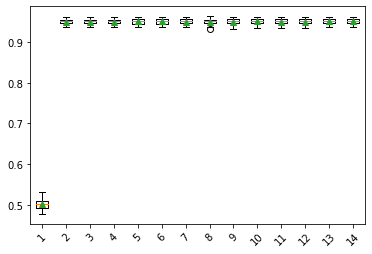

In [55]:

plt.boxplot(results, labels = names, showmeans= True)
plt.xticks(rotation = 45)
plt.show()

In [56]:
# evaluate the model for accuracy

In [57]:
steps = [('pca', PCA(n_components = 15)), ('m', LogisticRegression())]

In [58]:
model = Pipeline(steps=steps)

In [59]:
%%capture --no-stdout
model.fit(X_train_res,y_train_res);
y_pred = model.predict(X_test);

In [60]:
print("Predicted Class: %d" % y_pred[0])

Predicted Class: 1


In [61]:
# accuracy score of PCA model
cross_val_score(model, X_train_res, y_train_res, cv = 3, scoring = 'accuracy')

array([0.70490393, 0.64009177, 0.73580034])

In [62]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1642,  600],
       [ 161,  284]], dtype=int64)

Interpretation:

In [63]:
# precision, recall and F1 score for test set and predicted values
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test, y_pred)

0.3212669683257919

In [64]:
recall_score(y_test,y_pred)

0.6382022471910113

In [65]:
f1_score(y_test,y_pred)

0.4273890142964635

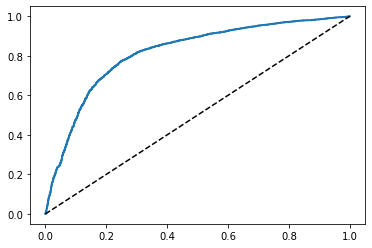

In [66]:
# plot ROC curve
from sklearn.metrics import roc_curve
y_scores = model.decision_function(X_train_res)
fpr, tpr, thresholds = roc_curve(y_train_res, y_scores)
def plot_roc_curve(fpr,tpr, label = None):
    plt.plot(fpr,tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1], 'k--')

plot_roc_curve(fpr,tpr)

## 5. Softmax Regression

### How is softmax regression related to logistic regression? What library can you use for softmax?
#### Both are used for classification tasks. Softmax can be used for multiclass classification (assuming the classes are mutually exclusive) and logistic regression can be used on binary classes. 
#### While there are specific libraries for softmax regression (keras and tensorflow), we can also use scikit learn's logistic regression class for softmax by setting the multi-class parameter to "multinomial"

## 6. KNN

In [67]:
# Use sklearn's KNNN to train and predict based on unbalanced training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


In [68]:
from sklearn import metrics
print("Accuracy: " , metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8299218459248232


In [69]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[2226,   16],
       [ 441,    4]], dtype=int64)

In [70]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91      2242
           1       0.20      0.01      0.02       445

    accuracy                           0.83      2687
   macro avg       0.52      0.50      0.46      2687
weighted avg       0.73      0.83      0.76      2687



In [71]:
#KNN with balanced set
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_res,y_train_res)
y_pred = knn.predict(X_test)

In [72]:
print("Accuracy: " , metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6270934127279494


In [73]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[1501,  741],
       [ 261,  184]], dtype=int64)

In [74]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75      2242
           1       0.20      0.41      0.27       445

    accuracy                           0.63      2687
   macro avg       0.53      0.54      0.51      2687
weighted avg       0.74      0.63      0.67      2687



# tune KNN hyperparameters using GridSearch
from sklearn.model_selection import GridSearchCV
knn_params = {
    "n_neighbors": range(1,20,2),
    "weights": ["uniform","distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 101)
grid_search = GridSearchCV(estimator = knn, param_grid = knn_params, n_jobs = 1, cv=cv, scoring= "accuracy", error_score = 0)
grid_results = grid_search.fit(X_train_res, y_train_res)

# best params
print(grid_results.best_params_)

# train and test model using new parameters
final_model = knn.set_params(**grid_results.best_params)
final_model.fit(X_train_res, y_train_res)
y_pred = final_model.predict(X_test)

confusion_matrix(y_test, y_pred)

classification_report(y_test,y_pred)

# plot ROC curve
from sklearn.metrics import roc_curve
y_scores = grid_search.decision_function(X_train_res)
fpr, tpr, thresholds = roc_curve(y_train_res, y_scores)
def plot_roc_curve(fpr,tpr, label = None):
    plt.plot(fpr,tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1], 'k--')

plot_roc_curve(fpr,tpr)

## 7. Naive Bayes

In [75]:
# train and test a model with GaussianNB
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_res,y_train_res)
y_pred = clf.predict(X_test)

In [76]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[ 939, 1303],
       [  79,  366]], dtype=int64)

In [77]:
print("Accuracy: " , metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.4856717528842575


In [78]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.42      0.58      2242
           1       0.22      0.82      0.35       445

    accuracy                           0.49      2687
   macro avg       0.57      0.62      0.46      2687
weighted avg       0.81      0.49      0.54      2687



In [79]:
# number of misclassifications
print("Number of misclassifications out of %d points: %d"
     % (X_test.shape[0], (y_test != y_pred).sum()))

Number of misclassifications out of 2687 points: 1382


### Categorical NB

In [80]:
# train and test a model with CategoricalNB
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train_res,y_train_res)
y_pred = clf.predict(X_test[2:3])

In [81]:
# confusion matrix
confusion_matrix(y_test[2:3],y_pred)

array([[1]], dtype=int64)

In [82]:
# classification report
print(classification_report(y_test[2:3],y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [83]:
# number of misclassifications
print("Number of misclassifications out of %d points: %d"
     % (X_test.shape[0], (y_test[2:3] != y_pred).sum()))

Number of misclassifications out of 2687 points: 0


## 8. Support Vector Machines

In [84]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# train using SVC
clf = make_pipeline(StandardScaler(), SVC(gamma = "auto"))
clf.fit(X_train_res,y_train_res)
# test model
y_pred = clf.predict(X_test)

In [85]:
confusion_matrix(y_test,y_pred)

array([[2057,  185],
       [ 210,  235]], dtype=int64)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2242
           1       0.56      0.53      0.54       445

    accuracy                           0.85      2687
   macro avg       0.73      0.72      0.73      2687
weighted avg       0.85      0.85      0.85      2687



In [87]:
# number of misclassifications
print("Number of misclassifications out of %d points: %d"
     % (X_test.shape[0], (y_test != y_pred).sum()))

Number of misclassifications out of 2687 points: 395


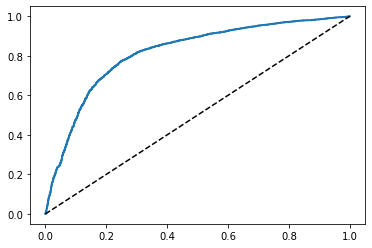

In [88]:
# plot ROC curve
from sklearn.metrics import roc_curve
y_scores = model.decision_function(X_train_res)
fpr, tpr, thresholds = roc_curve(y_train_res, y_scores)
def plot_roc_curve(fpr,tpr, label = None):
    plt.plot(fpr,tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1], 'k--')

plot_roc_curve(fpr,tpr)

## 9. Decision Tree

UsageError: Line magic function `%%capture` not found.


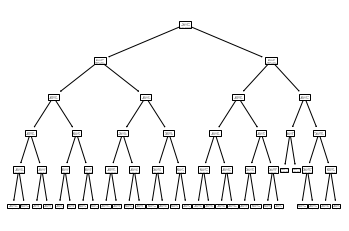

In [90]:
from sklearn.tree import DecisionTreeClassifier
# train and predict w/ Decision Tree on balanced training set
clf = DecisionTreeClassifier(random_state = 0, max_depth = 5)
clf.fit(X_train_res,y_train_res)
y_pred = clf.predict(X_test)

# plot decision tree
from sklearn import tree
tree.plot_tree(clf)
%%capture

In [ ]:
# confusion matrix 
confusion_matrix(y_test,y_pred)

In [ ]:
# classification report
print(classification_report(y_test,y_pred))

In [ ]:
# plot ROC curve
from sklearn.metrics import roc_curve
y_scores = clf.decision_function(X_train_res)
fpr, tpr, thresholds = roc_curve(y_train_res, y_scores)

plot_roc_curve(fpr,tpr)

UsageError: Line magic function `%%capture` not found.


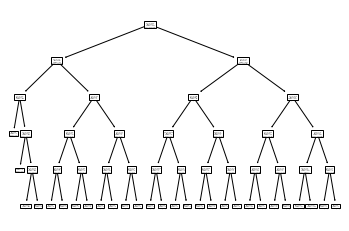

In [91]:

# repeat w/ unbalanced training set
clf = DecisionTreeClassifier(random_state = 0, max_depth = 5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# plot decision tree
tree.plot_tree(clf)
%%capture

In [95]:
# confusion matrix 
confusion_matrix(y_test,y_pred)

array([[2078,  164],
       [ 223,  222]], dtype=int64)

In [96]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2242
           1       0.58      0.50      0.53       445

    accuracy                           0.86      2687
   macro avg       0.74      0.71      0.72      2687
weighted avg       0.85      0.86      0.85      2687



In [ ]:
# plot ROC curve
from sklearn.metrics import roc_curve
y_scores = clf.fit(X_train,y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_train_res, y_scores)
plot_roc_curve(fpr,tpr)

Differences between balanced and unbalanced training sets:
- Interestingly enough, the unbalanced training set yielded more accurate predictions (8% increase) The first decision tree seems more skewed to the right

## 10. Random Forest

In [98]:
# use grid search to tune max_depth, min_samples_leaf, n_estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state = 42, n_jobs = -1, max_depth = 5, n_estimators = 100, oob_score = True)
rf_clf.fit(X_train_res,y_train_res)

params = {
    'max_depth' : [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators' : [10,25,30,50,100,200]
}
grid_search = GridSearchCV(estimator = rf_clf, param_grid = params, cv = 4, n_jobs = -1, verbose = 1, scoring = "accuracy")

In [99]:
%%time
grid_search.fit(X_train_res,y_train_res)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 1min 41s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=5, n_jobs=-1,
                                              oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

grid_search.fit(X_train_res,y_train_res).best_score

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

In [ ]:
# plot ROC curve
from sklearn.metrics import roc_curve
y_scores = rf_clf.decision_function(X_train_res)
fpr, tpr, thresholds = roc_curve(y_train_res, y_scores)
def plot_roc_curve(fpr,tpr, label = None):
    plt.plot(fpr,tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1], 'k--')

plot_roc_curve(fpr,tpr)

## 11. Boosting Algorithms

## Gradient boosting 

In [ ]:
# use Gradient boosting classifier to train
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 500, learning_rate = .05, random_state = 100, max_features = 15)
gbc.fit(X_train_res, y_train_res)

In [ ]:
# predict using gradient boost
gbc.predict(X_test)

In [ ]:
# gradient boost confusion matrix
confusion_matrix(y_test,y_pred)

In [ ]:
# gradient boost classification report
print(classification_report(y_test,y_pred))

In [ ]:
# gradient boost's misclassfications
print("Number of misclassifications out of %d points: %d"
     % (X_test.shape[0], (y_test != y_pred).sum()))

### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Train adaboost with Decision tree classifier
dt = DecisionTreeClassifier()
clf = AdaBoostClassifier(n_estimators = 100, base_estimator = dt, learning_rate = 1)
clf.fit(X_train_res, y_train_res)

# predict using adaboost
y_pred = clf.predict(X_test)

In [ ]:
# adaboost confusion matrix
confusion_matrix(y_test,y_pred)

In [ ]:
# ada boost classification report
print(classification_report(y_test,y_pred))

In [ ]:
# ada boost's misclassfications
print("Number of misclassifications out of %d points: %d"
     % (X_test.shape[0], (y_test != y_pred).sum()))

## 12. Discussion

Based on accuracy, KNN and Naive Bayes were the highest contenders for an ideal classification model. In the future, I could work on hyperparameter tuning and resampling/scaling data specifically for each of these models.